In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df['Count'] = 1
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,1


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'].dtypes

dtype('O')

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')

In [8]:
df['TotalCharges'].dtypes


dtype('float32')

In [9]:
df['gender'].value_counts()


Male      3555
Female    3488
Name: gender, dtype: int64

In [10]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
#To replace seniorcitizen value with a Yes and No
df['SeniorCitizen'].replace(1,'Yes', inplace=True)
df['SeniorCitizen'].replace(0,'No', inplace=True)
df['SeniorCitizen'].value_counts()


No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [12]:
df['Count'] = 1


In [13]:
df1 = df[['gender', 'SeniorCitizen', 'Count']]
df1.groupby(['gender', 'SeniorCitizen']).count().reset_index()

,gender,SeniorCitizen,Count
0,Female,No,2920
1,Female,Yes,568
2,Male,No,2981
3,Male,Yes,574


Text(0, 0.5, 'No of subscribers')

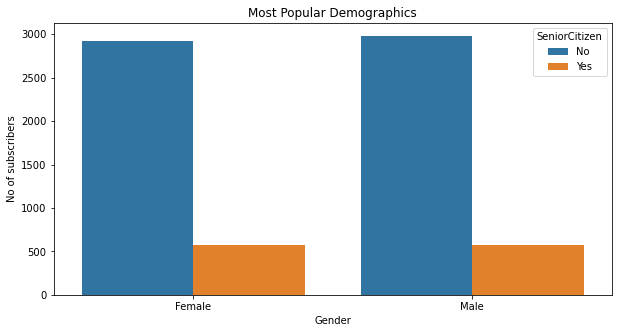

In [14]:
%matplotlib inline
#Popular demographic
df_demo=df.groupby(["gender", "SeniorCitizen"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y= "Count", hue="SeniorCitizen", data=df_demo)
plt.title("Most Popular Demographics")
plt.xlabel("Gender")
plt.ylabel("No of subscribers")


In [16]:
churn_df = df[['PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Contract', 'Churn']][df['Churn'] == "Yes"]


In [17]:
churn_df.head()

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Contract,Churn
2,Yes,DSL,Yes,Yes,No,No,No,No,53.85,Month-to-month,Yes
4,Yes,Fiber optic,No,No,No,No,No,No,70.70,Month-to-month,Yes
5,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,99.65,Month-to-month,Yes
8,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,104.80,Month-to-month,Yes
13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.70,Month-to-month,Yes


In [18]:
##Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
df['MonthlyCharges'].max()

118.75

In [19]:
df_maxprice = df[['PhoneService','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'Churn']][df['MonthlyCharges'] == 118.75]
df_maxprice


,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
4586,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,118.75,No


In [23]:
###If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?
df['Contract'].value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0, 0.5, 'No of subscribers')

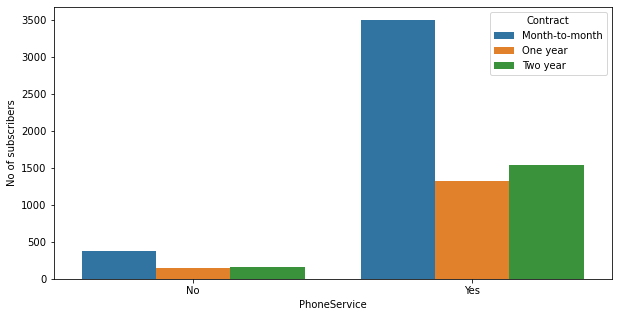

In [24]:
df_phone=df.groupby(["PhoneService", "Contract"])["Count"].count().reset_index()
plt.figure(figsize=(10,5))
sns.countplot(x="PhoneService", hue="Contract", data=df)
plt.xlabel("PhoneService")
plt.ylabel("No of subscribers")

In [26]:
df3 = df[['MonthlyCharges','Churn','Count']]
df3.groupby(['MonthlyCharges','Churn']).count().reset_index()

,MonthlyCharges,Churn,Count
0,18.25,No,1
1,18.40,No,1
2,18.55,No,1
3,18.70,No,2
4,18.75,No,1
...,...,...,...
2365,118.20,No,1
2366,118.35,Yes,1
2367,118.60,No,2
2368,118.65,No,1


In [27]:
####If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning: i. Basic, ii. Plus, iii. Premium
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0, 'MonthlyCharges')

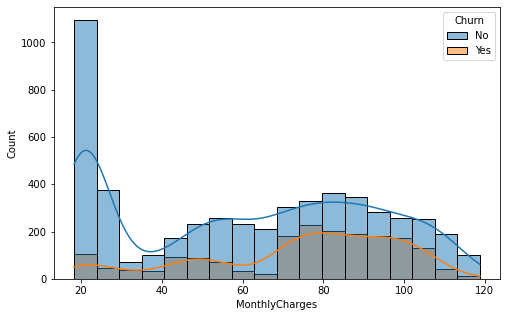

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(x="MonthlyCharges", hue ="Churn", data=df, kde=True,)
plt.xlabel("MonthlyCharges")


In [29]:
####Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Text(0, 0.5, 'No of subscribers')

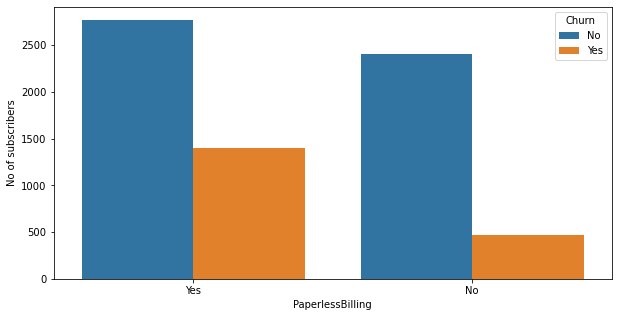

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
plt.xlabel("PaperlessBilling")
plt.ylabel("No of subscribers")

#No,going strictly paperless would make costumers using paperless billing to more likey churn.